# **Maybe a tutorial. Hope it works. lol.**

# **1** Preparation for Base model

(1) Create a new file named "construction-safety-project" in your google drive.
You can also name it whatever u like.
Remember to rewrite all paths below if u name the file in ur own way.

(2) Create 3 files in this new file. They are "data", "notebooks" and "runs".


(3) Download the css-data from https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/data

(4) Unzip the whole file and move all 5 files into "data" under "construction-safety-project".

(5) In this colab notebook, click "Runtime" in the panel, then click "change runtime type", "T4 GPU".

# **2** Build your base model

(1) Set up the environment and paths

In [ ]:
# Import the os module for interacting with the operating system
# Import the yaml module for working with YAML files
# Import the drive module from google.colab to mount Google Drive

import os
import yaml
from google.colab import drive

print("--> Mounting Google Drive..")
drive.mount('/content/drive')

print("\n--> Installing Ultralytics (YOLOv8)....")
# The -q flag makes the installation process quieter
# Install the ultralytics package using pip
!pip install ultralytics -q

# --- Path Configuration ---
# Project root directory, please ensure this path is correct in your Google Drive
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
# Define the data directory path by joining the root directory and 'data'
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data')
# Define the path to the dataset YAML configuration file
YAML_CONFIG_PATH = os.path.join(DATA_DIR, 'dataset.yaml')

# Print a message indicating that the environment setup is complete
print(" Environment setup complete.")
# Print the configured project root directory path
print(f"Project root directory set to: {PROJECT_ROOT_DIR}")


--> Mounting Google Drive..
Mounted at /content/drive

--> Installing Ultralytics (YOLOv8)....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
 Environment setup complete.
Project root directory set to: /content/drive/MyDrive/construction-safety-project


(2) Define Dataset Classes and Structure

This YAML file acts as a human-readable configuration file for the machine learning project. It centrally stores key parameters about the dataset, such as the file paths for training and validation sets, the total number of classes, and the specific class names. This separates configuration from code, making it easy to manage and modify training settings without altering the script itself, which is crucial for reproducibility and experimentation. (pasted from Google)

In [ ]:
# Define the list of class names for the dataset.
CLASS_NAMES = [
    'Hardhat',
    'Mask',
    'NO-Hardhat',
    'NO-Mask',
    'NO-Safety Vest',
    'Person',
    'Safety Cone',
    'Safety Vest',
    'machinery',
    'vehicle'
]
# Calculate the total number of classes.
NUM_CLASSES = len(CLASS_NAMES)

# --- Automatically generate paths for train/val/test sets ---
# Here we consistently use 'valid' to align with common YOLO conventions.
train_path = os.path.join(DATA_DIR, 'train', 'images')
val_path = os.path.join(DATA_DIR, 'valid', 'images')
test_path = os.path.join(DATA_DIR, 'test', 'images')

# Create a dictionary with the data that will be written to the YAML file.
yaml_data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': NUM_CLASSES,        # The number of classes.
    'names': CLASS_NAMES      # The list of class names.
}

print(" Dataset structure definition complete.")
print(f" Detected {NUM_CLASSES} classes.")
# Print the location where the YAML configuration file will be saved.
print(f" YAML configuration file will be saved to: {YAML_CONFIG_PATH}")

 Dataset structure definition complete.
 Detected 10 classes.
 YAML configuration file will be saved to: /content/drive/MyDrive/construction-safety-project/data/dataset.yaml


（3） Create and Write the YAML Configuration File

In [ ]:
# Ensure the target directory exists (I've encountered similar issues before).
os.makedirs(os.path.dirname(YAML_CONFIG_PATH), exist_ok=True)

# Write the dictionary to the YAML file.
with open(YAML_CONFIG_PATH, 'w') as f: #Opens (or creates) the YAML file at the path I provided (YAML_CONFIG_PATH) for writing.
    # Dump the python dictionary (yaml_data) to the file in YAML format.
    # sort_keys=False preserves the original order of dictionary items as you wrote them in Python; indent=2 makes the format more readable by using two spaces for each indentation level.
    yaml.dump(yaml_data, f, sort_keys=False, indent=2)

# Print a success message confirming the file was created.
print(f" Successfully created and wrote to YAML file.")

 Successfully created and wrote to YAML file.


（4） Verify File Content

In [ ]:
print("--- File Content Preview ---")
# Use the 'cat' shell command to display the content of the created YAML file.
!cat "{YAML_CONFIG_PATH}"

--- File Content Preview ---
train: /content/drive/MyDrive/construction-safety-project/data/train/images
val: /content/drive/MyDrive/construction-safety-project/data/valid/images
test: /content/drive/MyDrive/construction-safety-project/data/test/images
nc: 10
names:
- Hardhat
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- Safety Cone
- Safety Vest
- machinery
- vehicle


（5）Verify that key folder paths exist (for me, verifying existence is really important)

In [ ]:
# Print a status message indicating that the script is checking the folder structure.
print("--> Verifying dataset folder structure...")

train_images_path = os.path.join(DATA_DIR, 'train/images')
train_labels_path = os.path.join(DATA_DIR, 'train/labels')
valid_images_path = os.path.join(DATA_DIR, 'valid/images')
valid_labels_path = os.path.join(DATA_DIR, 'valid/labels')

# Create a dictionary to hold the friendly name and path of each directory to be checked.
paths_to_check = {
    "Training set images folder": train_images_path,
    "Training set labels folder": train_labels_path,
    "Validation set images folder": valid_images_path,
    "Validation set labels folder": valid_labels_path
}

# Initialize a boolean flag to track whether all paths exist.
all_paths_exist = True
# Iterate through each item in the dictionary.
for name, path in paths_to_check.items():
    # Check if the path does not point to an existing directory.
    if not os.path.isdir(path):
        print(f" × ERROR: {name} does not exist! Path: {path}")
        all_paths_exist = False
    else:
        print(f" √ {name} exists.")

# After the loop, check the status of the flag.
if not all_paths_exist:
    raise ValueError("Dataset folder structure is incorrect! Please check the error messages above and fix the paths in your Google Drive.")
else:
    print("\n √ Complete: All necessary folders have been found!")

--> Verifying dataset folder structure...
 √ Training set images folder exists.
 √ Training set labels folder exists.
 √ Validation set images folder exists.
 √ Validation set labels folder exists.

 √ Complete: All necessary folders have been found!


（6） Forcefully clear all cache files (sometimes if a previous step fails, this can help you delete the corrupted ones)

In [ ]:
# Import the glob module to find files matching a specific pattern.
import glob

print("--> Searching for and deleting old cache files...")

# Use glob to find all files ending with '.cache' recursively within the DATA_DIR.
# The '**/' pattern allows it to search in all subdirectories.'*.cache' means “files with a .cache extension.
cache_files = glob.glob(os.path.join(DATA_DIR, '**/*.cache'), recursive=True)

# Check if the list of found cache files is empty.
if not cache_files:
    print(" No cache files found, no cleanup needed.")
else:
    for f in cache_files:
        # Delete the current cache file.
        os.remove(f)
        # Print a confirmation message for the deleted file.
        print(f" Deleted cache: {f}")

print("\n Complete: Cache has been thoroughly cleared.")

--> Searching for and deleting old cache files...
 No cache files found, no cleanup needed.

 Complete: Cache has been thoroughly cleared.


（7） Generate and Verify the Final dataset.yaml

In [ ]:
print("--> Generating the final dataset.yaml based on the 10 classes and test path requirement...")

# Use our previously defined variables to build the final dictionary
# This dictionary now contains the full paths for train, val, test and information for the 10 classes
final_yaml_data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': NUM_CLASSES,
    'names': CLASS_NAMES
}

# Ensure the target directory exists
os.makedirs(os.path.dirname(YAML_CONFIG_PATH), exist_ok=True)

# Write the final dictionary to the YAML file
with open(YAML_CONFIG_PATH, 'w') as f:
    yaml.dump(final_yaml_data, f, sort_keys=False, indent=2) # indent=2 makes the output format nicer

print(f" Configuration file has been successfully updated and saved to: {YAML_CONFIG_PATH}")

print("\n--- Final Preview of YAML File Content ---")
!cat "{YAML_CONFIG_PATH}"
print("--------------------------")
print("\n Complete: Please double-check the preview content above, it should now include the test path and all 10 classes.")

--> Generating the final dataset.yaml based on the 10 classes and test path requirement...
 Configuration file has been successfully updated and saved to: /content/drive/MyDrive/construction-safety-project/data/dataset.yaml

--- Final Preview of YAML File Content ---
train: /content/drive/MyDrive/construction-safety-project/data/train/images
val: /content/drive/MyDrive/construction-safety-project/data/valid/images
test: /content/drive/MyDrive/construction-safety-project/data/test/images
nc: 10
names:
- Hardhat
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- Safety Cone
- Safety Vest
- machinery
- vehicle
--------------------------

 Complete: Please double-check the preview content above, it should now include the test path and all 10 classes.


# **3 Run your Base model now :)**

(1) Start the First Test Training

I think a mAP50 score approaching 0.80 is already the model's limit, so you can adjust the number of epochs to what you want and run some tests.

Note: 50 epochs cost about 1 hour and the mAP50 is around 0.789. And 100 epochs cost almost 2 hours.

In [ ]:
!yolo task=detect mode=train \
    model='yolov8n.pt' \
    data="{YAML_CONFIG_PATH}" \
    epochs=100 \
    imgsz=640 \
    project="{PROJECT_ROOT_DIR}/runs" \
    name='first_test_run_100_epochs'  # Use a descriptive name that matches the number of epochs above

print("\n Training command executed! Please observe the output below.")
print("If the number of corrupt images is too high, please stop the process and check the previous output for issues, or ask the AI, or ask me (Hyde).")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.207 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4

(2) Resume from Checkpoint and Continue Training to 150 Epochs

In [ ]:
print("--> Preparing to resume training from the last best result...")

# --- This is the key: define the path to the best model weights saved from your last training ---
# Please ensure the path and folder name below match what was actually generated
previous_best_model_path = f"{PROJECT_ROOT_DIR}/runs/first_test_run_100_epochs/weights/best.pt"

print(f" Model weights to be loaded: {previous_best_model_path}")

# Double-check if the file exists
import os
if not os.path.exists(previous_best_model_path):
    print("\n ERROR: Weight file not found! Please carefully check if the path above is correct!")
else:
    print("\n Weight file found, ready to resume training.")

    # --- Start a new training session, but loading our own model ---
    !yolo task=detect mode=train \
          model="{previous_best_model_path}" \
          data="{YAML_CONFIG_PATH}" \
          epochs=150 \
          imgsz=640 \
          project="{PROJECT_ROOT_DIR}/runs" \
          name='resumed_run_150_epochs' # Give it a new name

    print("\n Resume training command executed! The model will continue learning from where it left off.")

# **4 Analysis of Base Model training Results**

The results of this 100-epoch training are enough successful, with an overall mAP50 of 0.801, indicating that the model has acquired basic foundational recognition capabilities. However, its weaknesses are also quite distinct and are primarily concentrated in two areas:

The first challenge comes from the negative classes.
The precision for NO-Mask (0.623) and NO-Hardhat (0.729) is much lower than for their positive counterparts.
This happens because protective gear like masks and hardhats have simple and clear features, which are easy for the model to recognize.
In contrast, the “non-compliant” cases—such as uncovered faces, different hairstyles, and skin tones—look very different from each other.
This high variation makes it hard for the model to learn consistent patterns.

The second issue is with data quantity.
The vehicle class performs the worst, with a precision of 0.539.
This likely results from too few training samples (only 42) and an overly broad class definition that includes many different vehicle types.
Because of that, the model can’t form a stable understanding of what a “vehicle” looks like.
Its performance barely improved after more training, which suggests that the problem isn’t the model itself but the data.
Simply training longer won’t help — we need more samples or a clearer class definition.

---------------------------------------------------


# **5 Analyze visual plots** （Trian-Valid, not Train-Test）



1. In-depth Model Diagnosis (Analyze Visual Plots):
Confusion Matrix (confusion_matrix.png): Carefully analyze this matrix to identify specific inter-class confusions. For example, does the model frequently mistake vehicle for machinery, or does it miss NO-Hardhat detections (classifying it as background)?
PR Curve (PR_curve.png): Visually compare the PR curves of weak classes like vehicle and NO-Mask against strong classes like machinery. The significant difference in the area under the curve (AUC) will quantify their performance gap. （Done！）

**（Analyzing results for step 1 now...）**




-------------------------------------------------------

In [ ]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

--> Loading charts from the following path:
 /content/drive/MyDrive/construction-safety-project/runs/first_test_run_100_epochs


--- Confusion Matrix ---


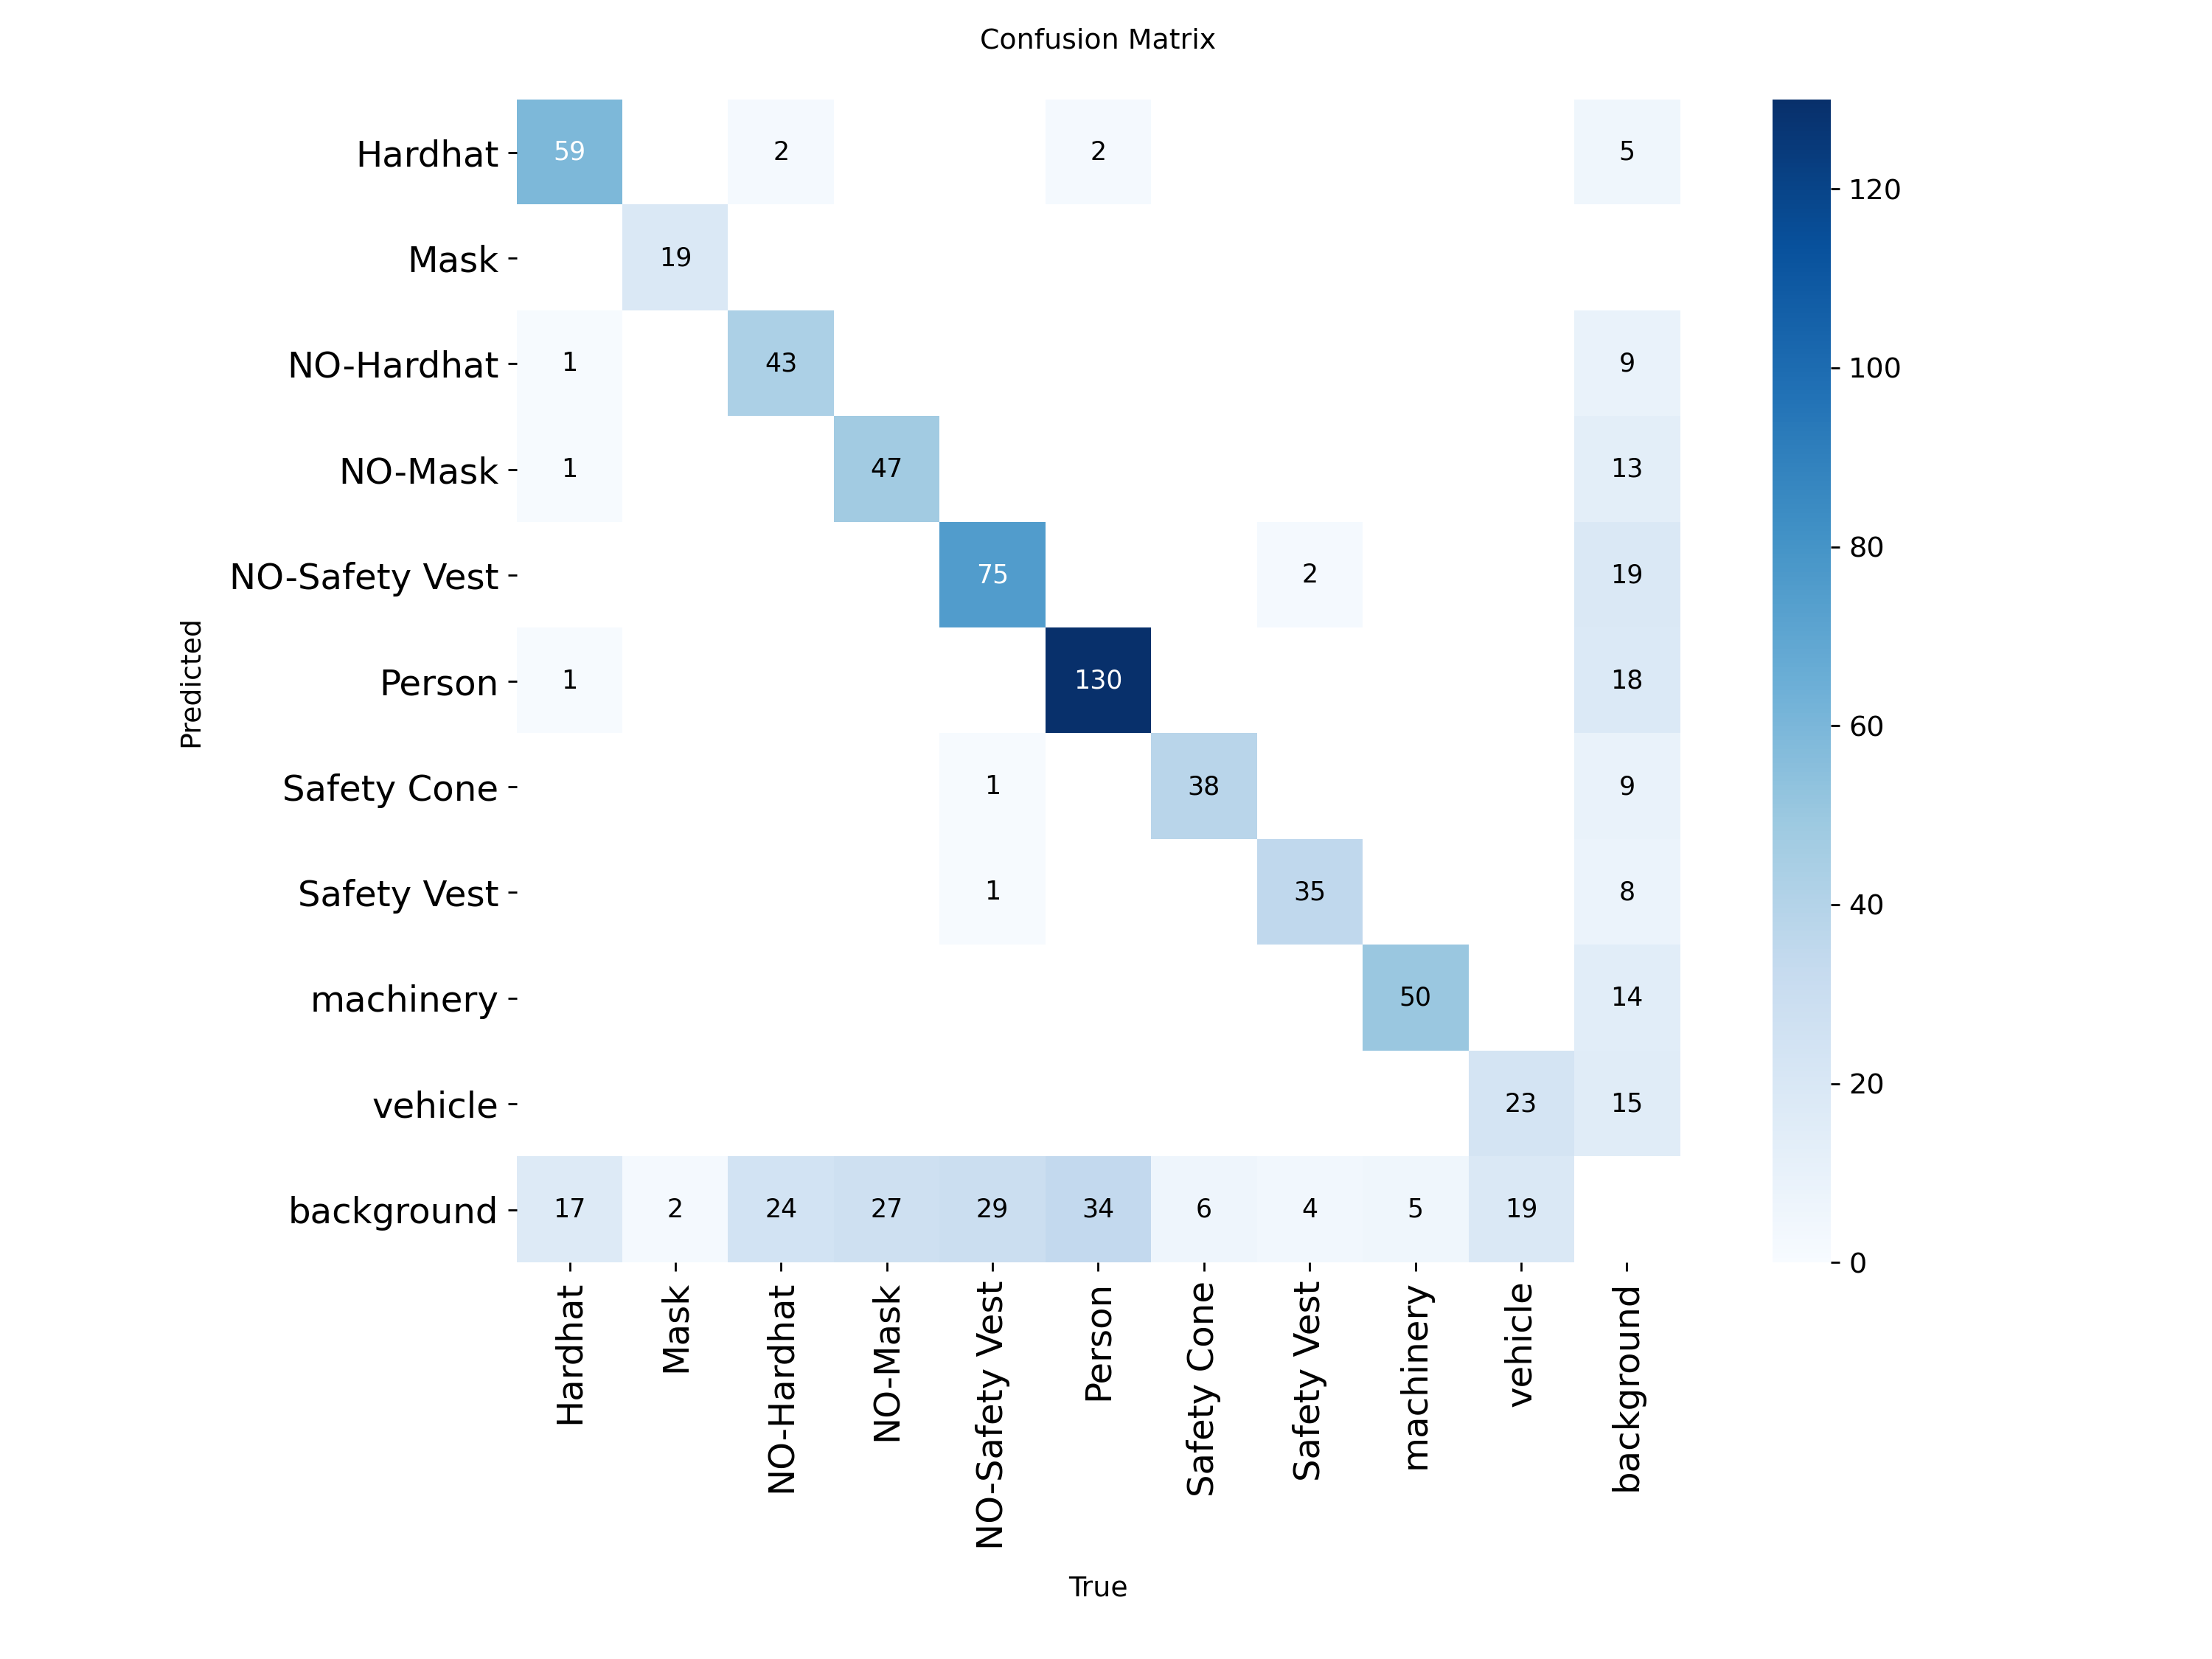

In [ ]:
# our own results folder
RESULTS_DIR = '/content/drive/MyDrive/construction-safety-project/runs/first_test_run_100_epochs'

print(f"--> Loading charts from the following path:\n {RESULTS_DIR}\n")


# Check if the path exists
if not os.path.exists(RESULTS_DIR):
    print(f" Error: Path not found! Please double-check if the 'RESULTS_DIR' variable is correct.")
else:
    # Step 2: Display the Confusion Matrix# Please modify the path below to y
    # The confusion matrix shows how often the model confuses one class with another.
    # Higher values on the diagonal are better (correct classifications). Off-diagonal values represent misclassifications.

    print("\n--- Confusion Matrix ---")
    confusion_matrix_path = os.path.join(RESULTS_DIR, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        display(Image(filename=confusion_matrix_path, width=800))
    else:
        print(" File not found.")

**Image 1 Confusion Matrix**

This chart shows where our model makes classification mistakes.
The horizontal axis (True) shows the real labels, and the vertical axis (Predicted) shows what the model guessed.
We mainly focus on the cells that have large numbers in the wrong places.

Key Findings:

1.1 Missed detections are the main issue.

In the bottom row labeled background, we can see how many real objects were wrongly predicted as “background.”
This means the model failed to detect them.
The most affected classes are NO-Mask (27), NO-Safety Vest (29), and NO-Hardhat (24).
This supports our idea that the model struggles more with these “negative” classes.
It tends to ignore them instead of making a confident prediction.
The vehicle class also had 19 missed detections, likely because we had too few training examples.

1.2 Confusion between classes is small.


Most numbers outside the main diagonal are very low (usually single digits).
For example, Hardhat was only predicted as Mask twice and as NO-Hardhat twice, compared to 59 correct cases.
That’s not a big issue.
The only exception is vehicle, which was misclassified as machinery five times.
This likely happened because the two look similar and we had limited data for vehicle.

**Conclusion:** The main problem isn’t the model mixing up categories.
The real problem is that it often fails to detect things—especially for the “negative” classes that have more visual variety.

Display the Main Results Plot (including PR curves and loss curves)



--- Overall Results Plot ---


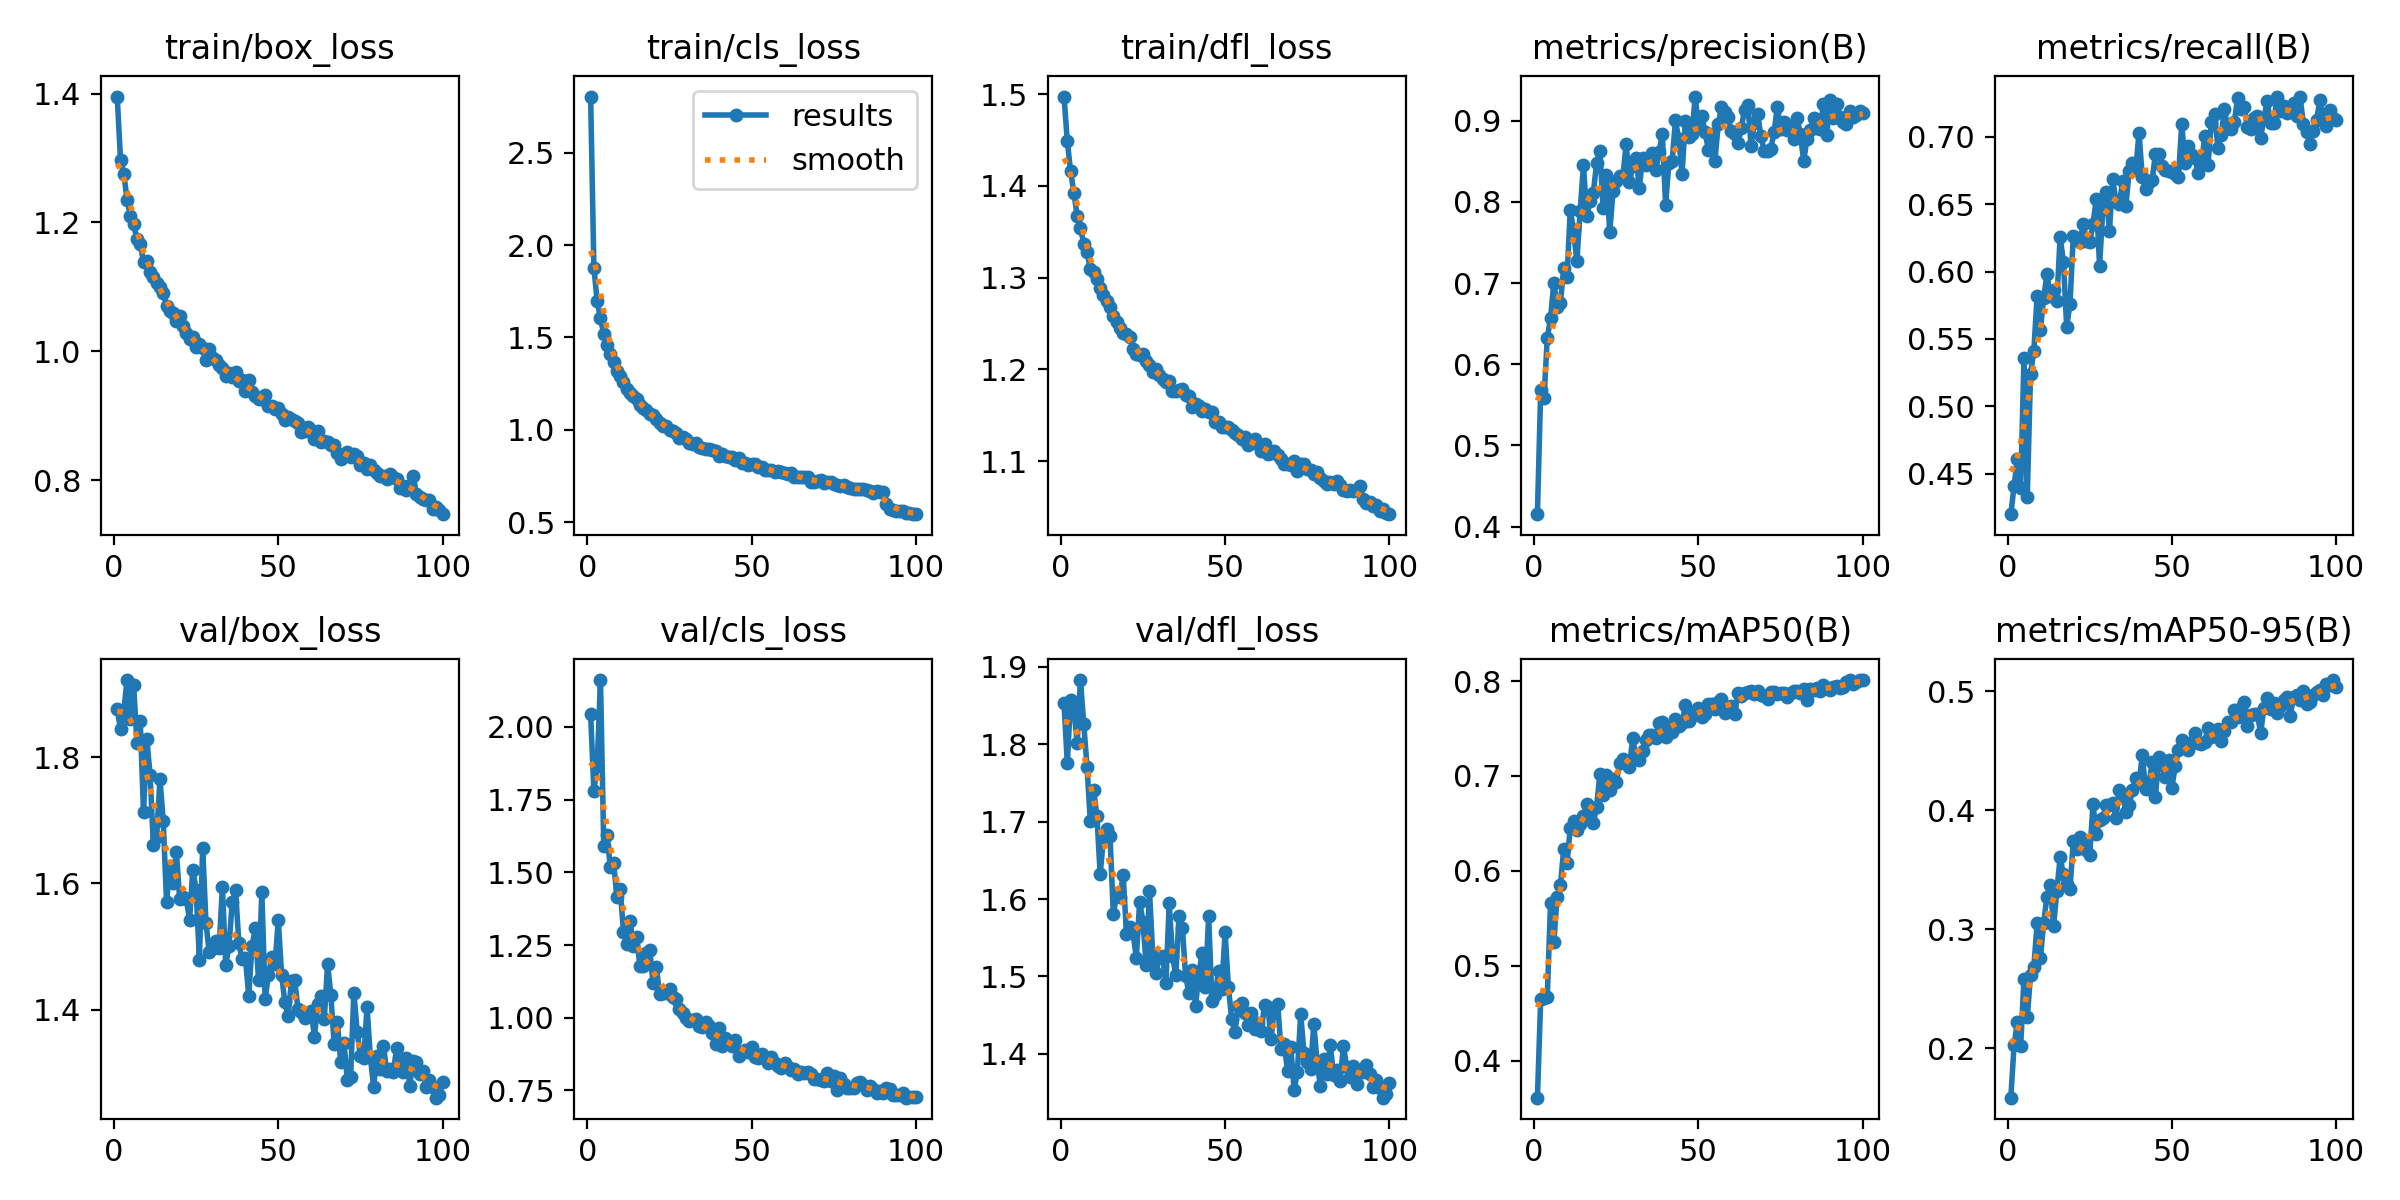

In [ ]:
  # This plot contains all key metrics:
    # - Box/Cls/DFL Loss: Loss functions, lower is better, indicating the model is learning well on the training set.
    # - mAP50 & mAP50-95: Accuracy on the validation set, higher is better.
    # - Precision/Recall: Precision and Recall curves.

print("\n\n--- Overall Results Plot ---")
results_path = os.path.join(RESULTS_DIR, 'results.png')
if os.path.exists(results_path):
    display(Image(filename=results_path, width=1000))
else:
    print(" File not found.")

-------------------

Display Prediction Examples on the Validation Set



--- Validation Batch Predictions ---


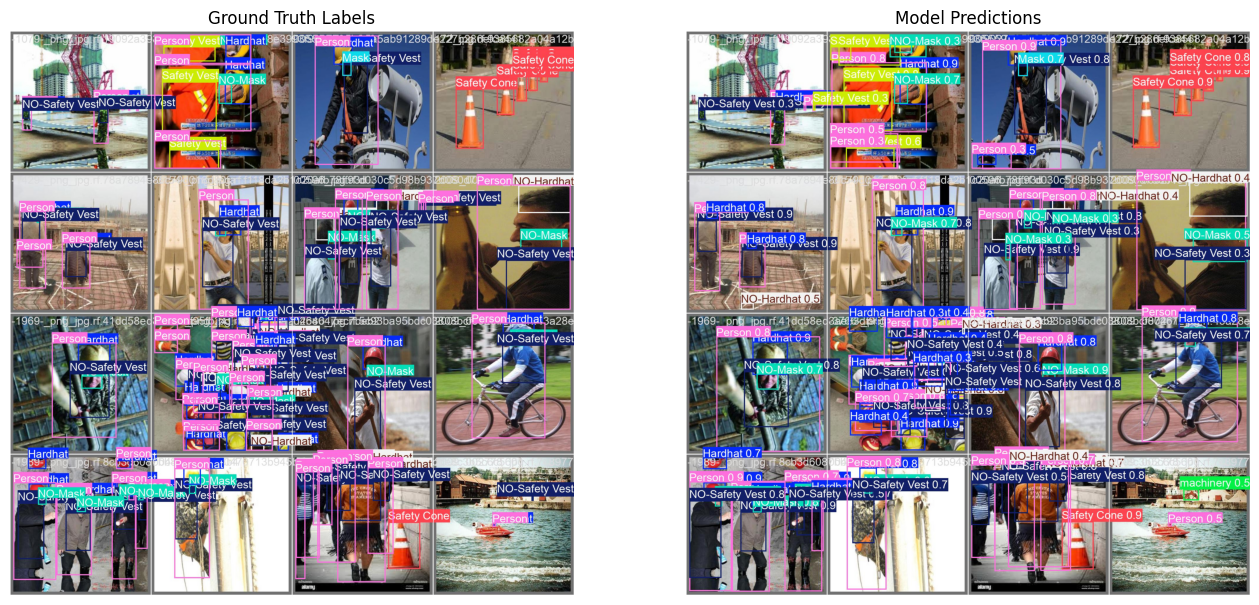

In [ ]:
# These images allow you to visually inspect how the model performs predictions on the validation set.
# The left image (labels) shows the ground truth, and the right image (pred) shows the model's predictions.

print("\n\n--- Validation Batch Predictions ---")
val_batch0_labels_path = os.path.join(RESULTS_DIR, 'val_batch0_labels.jpg')
val_batch0_pred_path = os.path.join(RESULTS_DIR, 'val_batch0_pred.jpg')

if os.path.exists(val_batch0_labels_path) and os.path.exists(val_batch0_pred_path):
    # Use matplotlib to display the two images side-by-side for easy comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.imshow(mpimg.imread(val_batch0_labels_path))
    ax1.set_title('Ground Truth Labels')
    ax1.axis('off')

    ax2.imshow(mpimg.imread(val_batch0_pred_path))
    ax2.set_title('Model Predictions')
    ax2.axis('off')

    plt.show()
else:
    print("Validation batch images not found.")

# **6 Pre-test Base Model**

**The test in Section 6 is only a preliminary test and does not represent the final quality.**

We used the train-valid comparison (similar to regular study and mock exams) because it has a larger sample size and provides more reliable reference results.
After comparing multiple models and tuning the parameters, we will proceed to the final testing stage (the real exam, so to speak), and then move on to the next phase.

Step 1: Configure the paths for evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
MODEL_PATH = '/content/drive/MyDrive/construction-safety-project/runs/first_test_run_100_epochs/weights/best.pt'
YAML_CONFIG_PATH = '/content/drive/MyDrive/construction-safety-project/data/dataset.yaml'
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'

print("--> Installing Ultralytics...")
!pip install ultralytics -q

# Check if files exist and provide clear feedback
print("--> Checking paths...")
print("--> Checking paths...")
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file not found! Please check if the path is correct: '{MODEL_PATH}'")
elif not os.path.exists(YAML_CONFIG_PATH):
    print(f"Error: YAML config file not found! Please check if the path is correct: '{YAML_CONFIG_PATH}'")
else:
    print("Path check passed! Model and config file were found.")

--> Installing Ultralytics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
--> Checking paths...
--> Checking paths...
Path check passed! Model and config file were found.


Step 2: Run Evaluation on the Test Set

In [ ]:
# The 'val' mode is used for evaluation. The key parameter is 'split=test', which
# forces YOLO to use the 'test' path from your YAML file instead of the default 'val' path.
# This will generate a new set of mAP scores, which serves as the most honest measure
# of the model's generalization ability.

!yolo task=detect mode=val \
    model="{MODEL_PATH}" \
    data="{YAML_CONFIG_PATH}" \
    split='test' \
    imgsz=640 \
    project='{PROJECT_ROOT_DIR}/runs/evaluation' \
    name='final_test_set_evaluation'

print("\n Evaluation command executed! Please check the output table above for your model's final score on unseen data.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.0 MB/s, size: 52.4 KB)
val: Scanning /content/drive/MyDrive/construction-safety-project/data/test/labels.cache... 82 images, 8 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 82/82 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 0.1it/s 1:24
                   all         82        760      0.862      0.685      0.748      0.463
               Hardhat         30        110       0.95      0.836 

# **7 Pre-Hyperparameter Tuning (Can be ingnored)**


To improve the model's generalization ability, especially for underperforming classes. Method: Keep all other settings constant and adjust only the Data Augmentation hyperparameters. For instance, add degrees=10.0 (random rotation of ±10 degrees), translate=0.1 (random translation of 10%), and mosaic=0.5 (50% probability of using mosaic augmentation) to your training command. This forces the model to learn more robust features rather than just memorizing the specific appearance of the training samples.

**Why We Must Train "Negative" Classes**


**This is a correction to our discussion. We can’t treat a low probability of wearing a hardhat as having no hardhat.**  

In summary:

Silence vs. A Statement: Not detecting a Hardhat is silence. The model tells you nothing. Detecting a NO-Hardhat is an explicit statement. The model is actively telling you, "I have found an instance of non-compliance here."

Actionable Data: For a safety monitoring system, you need actionable data. You need the system to generate an alert when a rule is broken. This requires an explicit detection of the "broken rule" state (i.e., NO-Hardhat), not just the absence of the "compliant" state.

What I mean is, if this person really isn’t wearing a hardhat, our model wouldn’t even output something like “Hardhat 34%.” It wouldn’t assign any value at all. It would just treat the person as part of the background. So we’d basically skip over this safety violation, because the model doesn’t even recognize the person as a detection target, and nothing gets recorded. There’s essentially no difference between that person and a rock on the roadside. I’m not sure if I explained it clearly — you can ask the AI if you’d like.

**Jesus. Hyperparameter tuning really costs more time! 50 epochs cost 1h15min**

**Make no progress at all. lol**

In [ ]:
# Hyperparameter Tuning
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = '/content/drive/MyDrive/construction-safety-project/data/dataset.yaml'
RUN_NAME = 'yolov8n_50e_heavy_aug' # A descriptive name for this new run

print(f"--> Starting new experiment: {RUN_NAME}")
print("    Model: yolov8n.pt")
print("    Epochs: 50")
print("    Augmentation: Heavy (degrees, translate, scale, mosaic)")

# --- Execute Training Command ---
!yolo task=detect mode=train \
      model='yolov8n.pt' \
      data="{YAML_CONFIG_PATH}" \
      epochs=50 \
      imgsz=640 \
      project="{PROJECT_ROOT_DIR}/runs" \
      name="{RUN_NAME}" \
      degrees=15.0 \
      translate=0.1 \
      scale=0.5 \
      mosaic=1.0

print(f"\n Experiment '{RUN_NAME}' has started!")
print("Upon completion, compare the results in its folder with your initial 50-epoch run.")

--> Starting new experiment: yolov8n_50e_heavy_aug
    Model: yolov8n.pt
    Epochs: 50
    Augmentation: Heavy (degrees, translate, scale, mosaic)
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, m

New: to 150 epochs

In [ ]:
import os

PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = '/content/drive/MyDrive/construction-safety-project/data/dataset.yaml'
PREVIOUS_RUN_NAME = 'yolov8n_50e_heavy_aug2'
NEW_RUN_NAME = 'yolov8n_100e_heavy_aug_resumed'

MODEL_TO_RESUME_PATH = os.path.join(PROJECT_ROOT_DIR, 'runs', PREVIOUS_RUN_NAME, 'weights/best.pt')

print(f"--> Resuming training from: {MODEL_TO_RESUME_PATH}")
print(f"    New run will be saved to: {NEW_RUN_NAME}")

if not os.path.exists(MODEL_TO_RESUME_PATH):
    print(f" Error: Model weights not found at the specified path. Please double-check the PREVIOUS_RUN_NAME.")
else:
    !yolo task=detect mode=train \
          model="{MODEL_TO_RESUME_PATH}" \
          data="{YAML_CONFIG_PATH}" \
          epochs=100 \
          imgsz=640 \
          project="{PROJECT_ROOT_DIR}/runs" \
          name="{NEW_RUN_NAME}" \
          degrees=15.0 \
          translate=0.1 \
          scale=0.5 \
          mosaic=1.0

    print(f"\n Resumed training command for '{NEW_RUN_NAME}' has been executed!")

--> Resuming training from: /content/drive/MyDrive/construction-safety-project/runs/yolov8n_50e_heavy_aug2/weights/best.pt
    New run will be saved to: yolov8n_100e_heavy_aug_resumed
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup

# **8. v8n or v8s ? (Done)(T4 GPU)(v8n)**

To directly boost performance by increasing the model's learning capacity. Method: Conduct a new 100-epoch training run using the yolov8s.pt (Small) model to replace the current yolov8n.pt (Nano) model. Compare the mAP results from both runs to verify if a larger model can effectively overcome the issues caused by data bottlenecks.

![我的表情包](https://drive.google.com/uc?id=1igwgB-pkx8PJgfVgmL16b-DG2ghalsbo)

In [ ]:
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = '/content/drive/MyDrive/construction-safety-project/data/dataset.yaml'

MODEL_TYPE = 'yolov8s.pt'
EPOCHS = 100

RUN_NAME = 'yolov8s_100e_baseline'

print(f"--> Starting Final Experiment: {RUN_NAME}")
print(f"    Model Architecture: {MODEL_TYPE}")
print(f"    Total Epochs: {EPOCHS}")
print("    Augmentation: Using default YOLOv8 settings (no heavy overrides).")
print("    This run will be the final benchmark against the best yolov8n model.")

!yolo task=detect mode=train \
      model="{MODEL_TYPE}" \
      data="{YAML_CONFIG_PATH}" \
      epochs={EPOCHS} \
      imgsz=640 \
      project="{PROJECT_ROOT_DIR}/runs" \
      name="{RUN_NAME}"

print(f"\n The final experiment '{RUN_NAME}' has been launched!")
print("Please monitor the training process. This will take longer than the yolov8n model due to the increased parameter count.")

--> Starting Final Experiment: yolov8s_100e_baseline
    Model Architecture: yolov8s.pt
    Total Epochs: 100
    Augmentation: Using default YOLOv8 settings (no heavy overrides).
    This run will be the final benchmark against the best yolov8n model.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=0.



---



# **9 Iterable hyperparameters based on v8n (Failed) (Fate)**

**PS:** Due to GPU limitations and the long runtime of each training cycle (About 4 - 7 hours), this process was conducted through **manual iteration**.


Objectives:

Use Optuna to perform hyperparameter optimization on **YOLOv8n** over a short training cycle (15 epochs), then apply the best parameters to a full training of **YOLOv8s**.
This approach improves the **mAP50 for negative samples** and enhances the **accuracy of safety violation detection**.


##**(1) Why Optuna**?

Optuna is an open-source hyperparameter optimization framework based on Bayesian optimization. It efficiently explores parameter spaces using probabilistic models to find the best values.

https://docs.ultralytics.com/guides/hyperparameter-tuning/#can-i-use-ray-tune-for-advanced-hyperparameter-optimization-with-yolo11

## **(2) Top 5 Hyperparameters for Negative Classes （Ongoing）**

        "lr0": trial.suggest_float("lr0", 1e-4, 1e-2, log=True),
        "mosaic": trial.suggest_float("mosaic", 0.0, 1.0),
        "mixup": trial.suggest_float("mixup", 0.0, 0.5),
        "cls": trial.suggest_float("cls", 0.2, 1.0),
        "hsv_s": trial.suggest_float("hsv_s", 0.0, 0.9)

This explanation is proudly brought to you by **Gemini** , **GPT** and me.


![我的表情包](https://drive.google.com/uc?id=1zY_xpNw71BkXgHP74FcyF0VDlEFwMxEH)

**lr0 (Initial Learning Rate)**


**Purpose:** Controls how fast the model starts learning.


**Why it matters:** Negative samples have more subtle and inconsistent features than positive ones. If the learning rate is too high, the model may skip over these fine details; if it’s too low, 15 epochs won’t be enough for sufficient learning. Optuna helps find the optimal starting rate.
**Suggested range:** `trial.suggest_float("lr0", 1e-4, 1e-2, log=True)` (0.0001–0.01)

---

**mosaic (Mosaic Augmentation Probability)**


**Purpose:** Controls the probability of combining four images into one for data augmentation.


**Why it matters:** Our experiments show that strong mosaic augmentation harms *NO-Hardhat* detection, but turning it off completely hurts *NO-Mask* and *vehicle*. This suggests there’s a “sweet spot.” Letting Optuna search between 0 and 1 helps find this balance.
**Suggested range:** `trial.suggest_float("mosaic", 0.0, 1.0)`

---

**mixup (MixUp Augmentation Probability)**


**Purpose:** Controls the probability of blending two images and their labels.


**Why it matters:** MixUp is a strong regularization method that forces the model to learn smoother decision boundaries between classes. This helps the model better distinguish confusing negative samples from the background and reduces missed detections.
**Suggested range:** `trial.suggest_float("mixup", 0.0, 0.5)`

---

**cls (Classification Loss Weight)**


**Purpose:** Adjusts the weight of the classification loss in the total loss.


**Why it matters:** Negative samples are often misclassified as background — a core classification issue.

* Increasing `cls`: makes the model focus more on classification accuracy, pushing it to better separate *NO-Hardhat* from background.
* Decreasing `cls`: makes the model less “strict,” more likely to predict a box even when uncertain, which may improve recall.
  This trade-off makes it an ideal parameter for Optuna optimization.
  **Suggested range:** `trial.suggest_float("cls", 0.2, 1.0)` (default = 0.5)

---

**hsv_s (HSV-Saturation Augmentation)**


**Purpose:** Randomly adjusts image color saturation.


**Why it matters:** We suspect color augmentation harms *Safety Vest* performance. Letting Optuna tune the saturation range helps find a value that boosts generalization without degrading color-sensitive features. It may also benefit detection of negative samples (e.g., skin tones).
**Suggested range:** `trial.suggest_float("hsv_s", 0.0, 0.9)` (default = 0.7)


In [ ]:
# ===================================================================
# Step 1: Install Dependencies
# ===================================================================
!pip install optuna -q
!pip install ultralytics -q

from ultralytics import YOLO
import os

# ===================================================================
# Step 2: Configure the Tuning Process
# ===================================================================

# --- Configuration ---
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/dataset.yaml')
EPOCHS = 15
TRIALS = 20  # Updated to 20 trials as requested
MODEL_TO_TUNE = 'yolov8n.pt'

# ===================================================================
# Step 3: Run the Built-in Tuner (The Correct and Recommended Method)
# ===================================================================
# This is the official and most reliable way to tune YOLOv8 with Optuna.
# It handles pruning and all internal logic automatically.

print("--> Starting Optuna hyperparameter tuning with YOLO's built-in tuner...")
print(f"    Model: {MODEL_TO_TUNE}")
print(f"    Epochs per trial: {EPOCHS}")
print(f"    Number of trials: {TRIALS}")

# --- Load the model ---
model = YOLO(MODEL_TO_TUNE)

# --- Execute the tuning process ---
# Pruning is enabled by default.
results = model.tune(
    data=YAML_CONFIG_PATH,
    epochs=EPOCHS,
    imgsz=640,
    project=os.path.join(PROJECT_ROOT_DIR, 'runs/optuna_tuning'),
    name='yolov8n_20_trials',
    iterations=TRIALS,
    optimizer='AdamW',
    plots=False,
    save=False,
    val=True,
    space={
        "lr0": [1e-4, 1e-2],
        "mosaic": [0.0, 1.0],
        "mixup": [0.0, 0.5],
        "cls": [0.2, 1.0],
        "hsv_s": [0.0, 0.9]
    }
)

# ===================================================================
# Step 4: Display the Best Parameters
# ===================================================================
print("\n🎉 Optuna tuning finished!")
print("Best hyperparameters found:")
print(results.best_params)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--> Starting Optuna hyperparameter tuning with YOLO's built-in tuner...
    Model: yolov8n.pt
    Epochs per trial: 15
    Number of trials: 20
Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/construction-safety-project/runs/optuna_tuning/yolov8n_20_trials'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'mosaic': 1.0, 'mixup': 0.0, 'cls': 0.5, 'hsv_s': 0.7}
Saved /content/drive/MyDrive/construction-safety-project/runs/optuna_tuning/yolov8n_20_trials/tune_scatter_plots.pn

AttributeError: 'NoneType' object has no attribute 'best_params'

In [ ]:
import pandas as pd
import os

# --- 1. Configuration: Set up your project paths ---

# The root directory of your project on Google Drive
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'

# !!! [IMPORTANT] !!!
# Set this to the exact name of your tuning results folder.
# Based on your screenshot, it should be 'yolov8n_20_trials'.
TUNE_FOLDER_NAME = 'yolov8n_20_trials'


# --- 2. Build the full path to the results file ---
# The filename from your screenshot is 'tune_results.csv'
results_csv_path = os.path.join(PROJECT_ROOT_DIR, 'runs/optuna_tuning', TUNE_FOLDER_NAME, 'tune_results.csv')


# --- 3. Read, process, and display the results ---
try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(results_csv_path)

    # The primary metric to sort by (from your screenshot's 'A' column)
    metric_to_sort_by = 'fitness'

    # Sometimes pandas reads the row numbers as a column named 'Unnamed: 0', let's remove it if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])

    # Sort the DataFrame by the fitness score in descending order (best results appear first)
    sorted_df = df.sort_values(by=metric_to_sort_by, ascending=False)


    # --- 4. Display the formatted results table ---

    # Set pandas display options for better readability in Colab
    pd.set_option('display.max_rows', 50)      # Show up to 50 trials
    pd.set_option('display.max_columns', None) # Ensure all parameter columns are visible
    pd.set_option('display.width', 1000)       # Use more horizontal space for the table

    print("✅ All trial results (sorted from best to worst):")
    print(sorted_df)

except FileNotFoundError:
    print(f"❌ Error: Could not find the file '{results_csv_path}'.")
    print("Please double-check that your TUNE_FOLDER_NAME is set correctly.")

✅ All trial results (sorted from best to worst):
    fitness      lr0   mosaic  mixup      cls    hsv_s
19  0.32690  0.00526  0.84130    0.0  0.43406  0.80506
16  0.31949  0.00514  0.93172    0.0  0.41853  0.62904
10  0.31779  0.00642  0.83731    0.0  0.42250  0.69421
13  0.31715  0.00541  0.84914    0.0  0.48335  0.62053
17  0.31382  0.00518  0.67183    0.0  0.37489  0.64538
7   0.31334  0.00731  0.94738    0.0  0.40361  0.66096
18  0.30876  0.00580  0.94352    0.0  0.36408  0.60505
8   0.30791  0.00653  0.69374    0.0  0.47051  0.67545
6   0.30272  0.00831  0.97247    0.0  0.42752  0.66613
3   0.30077  0.00854  1.00000    0.0  0.40293  0.70000
14  0.30050  0.00884  1.00000    0.0  0.46804  0.69882
12  0.29559  0.00879  0.72620    0.0  0.40283  0.56154
15  0.29488  0.00793  0.64221    0.0  0.35495  0.65950
0   0.29311  0.01000  1.00000    0.0  0.50000  0.70000
2   0.29311  0.01000  1.00000    0.0  0.50000  0.70000
11  0.29259  0.00844  0.88958    0.0  0.33335  0.84474
9   0.29029  0.0

-----------------------------------

**Hyperparameter Analysis**

**1. mixup**
**Observation:** Surprisingly, all top-performing trials had a mixup value of 0. When mixup was applied (>0), model performance dropped sharply, so none of those trials appeared in the Top 20.
**Conclusion:** Mixup seems harmful for this dataset. Instead of improving results, it actually hurts performance.
**Recommendation:** Disable mixup entirely in the next tuning round to save computation.

---

**2. lr0 (Initial Learning Rate)**
**Observation:** The best trials (fitness > 0.31) consistently used lr0 between 0.005 and 0.007, such as 0.00526 or 0.00731. Higher values (e.g., 0.01) led to worse performance.
**Conclusion:** The optimal range is around 0.005. The original range [1e-4, 1e-2] worked well, and we’ve found the sweet spot within it.
**Recommendation:** Narrow the search range around 0.005 for finer tuning.

---

**3. mosaic (Mosaic Augmentation Probability)**
**Observation:** High-performing trials generally had high mosaic values, most above 0.8, and even over 0.9 (e.g., 0.84, 0.93, 0.95).
**Conclusion:** Mosaic augmentation significantly improves model performance — higher probabilities work better.
**Recommendation:** Focus the search on the high-probability range.

---

**4. cls (Classification Loss Weight)**
**Observation:** The best trials had cls values between 0.35 and 0.5 (e.g., 0.43, 0.42, 0.37).
**Conclusion:** A slightly lower cls weight than the default seems better for this dataset.
**Recommendation:** Limit future searches to this effective range.

---

**5. hsv_s (HSV Saturation Augmentation)**
**Observation:** Strong results appeared with higher hsv_s values, usually above 0.6 and up to 0.8.
**Conclusion:** Adjusting saturation improves model generalization.
**Recommendation:** Prioritize higher hsv_s values in the next tuning round.


In [ ]:
# =========================================================================
# === Round 2: Fine-tuning Search Space (Based on Round 1 Analysis) ===
# =========================================================================
# This search space is narrowed down to focus on the most promising regions
# discovered in the initial 20 trials.

space = {
    # Narrowing the learning rate to the observed "sweet spot" around 0.005-0.007
    "lr0": [0.004, 0.008],

    # Focusing on high mosaic probabilities, as they consistently performed well
    "mosaic": [0.8, 1.0],

    # Disabling mixup entirely as it proved to be detrimental to performance.
    # We can remove it from the search space, and it will use its default (0.0).
    # "mixup": [0.0, 0.0], # Option 1: Force it to be 0
                          # Option 2 (Recommended): Just remove the line.

    # Concentrating on the cls weight range that yielded the best results
    "cls": [0.35, 0.5],

    # Focusing on the higher range for saturation augmentation, which proved beneficial
    "hsv_s": [0.6, 0.9],
}

# Note on 'mixup': By removing the 'mixup' key from the dictionary, the tuner
# will not optimize it, and YOLO will use its default value, which is 0.0.
# This is the cleanest way to disable it for this tuning run.

In [ ]:
# ===================================================================
# Step 1: Install Dependencies
# ===================================================================
!pip install optuna -q
!pip install ultralytics -q

from ultralytics import YOLO
import os

# ===================================================================
# Step 2: Configure the Tuning Process
# ===================================================================

# --- Configuration ---
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/dataset.yaml')
EPOCHS = 15
TRIALS = 30  # Updated to 30 trials as requested
MODEL_TO_TUNE = 'yolov8n.pt'

# ===================================================================
# Step 3: Run the Built-in Tuner (The Correct and Recommended Method)
# ===================================================================
# This is the official and most reliable way to tune YOLOv8 with Optuna.
# It handles pruning and all internal logic automatically.

print("--> Starting Optuna hyperparameter tuning with YOLO's built-in tuner...")
print(f"    Model: {MODEL_TO_TUNE}")
print(f"    Epochs per trial: {EPOCHS}")
print(f"    Number of trials: {TRIALS}")

# --- Load the model ---
model = YOLO(MODEL_TO_TUNE)

# --- Execute the tuning process ---
# Pruning is enabled by default.
results = model.tune(
    data=YAML_CONFIG_PATH,
    epochs=EPOCHS,
    imgsz=640,
    project=os.path.join(PROJECT_ROOT_DIR, 'runs/optuna_tuning'),
    name='yolov8n_30_trials_round2_narrow',
    iterations=TRIALS,
    optimizer='AdamW',
    plots=False,
    save=False,
    val=True,
    space={
        "lr0": [0.004, 0.008],
        "mosaic": [0.8, 1.0],
        "cls": [0.35, 0.5],
        "hsv_s": [0.6, 0.9]
    }
)

# ===================================================================
# Step 4: Display the Best Parameters
# ===================================================================
print("\n🎉 Optuna tuning finished!")
print("Best hyperparameters found:")
print(results.best_params)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 9.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--> Starting Optuna hyperparameter tuning with YOLO's built-in tuner...
    Model: yolov8n.pt
    Epochs per trial: 15
    Number of trials: 30
Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/construction-safety-project/runs/optuna_tuning/yolov8n_30_trials_round2_narrow'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/30 with hyperparameters: {'lr0': 0.008, 'mosaic': 1.0, 'cls': 0.5, 'hsv_s': 0.7}
Saved /content/drive/MyDrive/construction-safety-project/runs/optuna_tuning/yolov8n_30_trials_round2_narrow/tune_sc

AttributeError: 'NoneType' object has no attribute 'best_params'

1. 跑v8s的调参后结果

2. 摆混淆矩阵，看需不需要调conf阈值

3. Final Test

# 10 Final hyperparameter tuning training Model (Failed)(Then we choose baseline model)

In [ ]:
from ultralytics import YOLO
import os

# --- 1. Load the base model ---
# Always start from the official pretrained weights for the best results
model = YOLO('yolov8n.pt')

# --- 2. Configuration for the FINAL, HIGH-PERFORMANCE training run ---
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/dataset.yaml')
FINAL_EPOCHS = 150 # You can increase this to 200 or 300 if you have time

# --- 3. Train with your BEST hyperparameters on the A100 GPU ---
results = model.train(
    data=YAML_CONFIG_PATH,
    epochs=FINAL_EPOCHS,
    imgsz=640,
    project=os.path.join(PROJECT_ROOT_DIR, 'runs/training'),
    name='yolov8n_A100_final_model', # A new, clear name for the final model

    # === Your hard-won best parameters from tuning! ===
    lr0=0.00415,
    mosaic=0.998,
    cls=0.42,
    hsv_s=0.9,

    # === A100 Specific Tuning ===
    # With an A100, you can and should use a larger batch size.
    # Start with 32, if it doesn't crash, you can even try 64.
    batch=32,

    # Use the recommended AdamW optimizer
    optimizer='AdamW',

    # Save the model periodically in case Colab disconnects
    save_period=10 # Saves a checkpoint every 10 epochs
)

# After training is complete, you can also run validation
# validation_results = model.val()
# print(validation_results)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.42, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=

In [ ]:
from ultralytics import YOLO
import os

# ==============================================================================
# --- 1. Configuration: Model and Paths ---
# ==============================================================================

# Load the base YOLOv8n model. We always start from the official pretrained weights
# to leverage transfer learning.
model = YOLO('yolov8n.pt')

# Define the root directory of your project and the path to your dataset YAML file.
PROJECT_ROOT_DIR = '/content/drive/MyDrive/construction-safety-project'
YAML_CONFIG_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/dataset.yaml')


# ==============================================================================
# --- 2. Final Training Parameters ---
# ==============================================================================

# Set the total number of epochs for the final, full training run.
# 100 epochs is a good baseline. You can increase to 150 or 200 for potentially better results.
FINAL_EPOCHS = 100

# Define a clear and descriptive name for this new experiment.
# This ensures results are saved in a new folder and won't overwrite previous runs.
EXPERIMENT_NAME = 'yolov8n_final_hybrid_params_100e'


# ==============================================================================
# --- 3. Execute The Final Training with the Hybrid Hyperparameter Strategy ---
# ==============================================================================

print("Starting final training with the HYBRID hyperparameter strategy...")
print(f"Total epochs: {FINAL_EPOCHS}")
print(f"Results will be saved to: runs/training/{EXPERIMENT_NAME}")

# The core training function call.
results = model.train(
    # --- Essential configurations ---
    data=YAML_CONFIG_PATH,
    epochs=FINAL_EPOCHS,
    imgsz=640,
    project=os.path.join(PROJECT_ROOT_DIR, 'runs/training'),
    name=EXPERIMENT_NAME,

    # --- HYBRID HYPERPARAMETERS ---
    # We are combining the best of both worlds:
    # - The learning rate that worked well for 100 epochs.
    # - The other parameters discovered during the 15-epoch tuning.

    # Use the default learning rate, which proved effective for long training runs.
    lr0=0.01,

    # Use the optimized 'cls' and 'hsv_s' values from your tuning.
    cls=0.42,
    hsv_s=0.9,

    # Keep the high 'mosaic' value, which was consistently beneficial.
    mosaic=0.998,

    # 'mixup' is 0.0 by default, which your tuning confirmed is optimal. No need to specify.

    # --- Other important training settings ---

    # Using a larger batch size is recommended, especially on powerful GPUs like T4 or A100.
    # Adjust based on your GPU memory. 16 is a safe start for v8n.
    batch=16,

    # The AdamW optimizer is generally a robust choice.
    optimizer='AdamW',

    # Save a model checkpoint periodically. This is crucial for long training runs
    # in case the session disconnects.
    save_period=10 # Saves a checkpoint every 10 epochs.
)

print("\n✅ Final training complete!")
print("Your new, optimized model and results are saved in:")
print(f"{os.path.join(PROJECT_ROOT_DIR, 'runs/training', EXPERIMENT_NAME)}")

# You can optionally run a final validation on the best model right after training.
# print("\nRunning final validation on the best saved model...")
# best_model = YOLO(os.path.join(PROJECT_ROOT_DIR, 'runs/training', EXPERIMENT_NAME, 'weights/best.pt'))
# validation_results = best_model.val()

Starting final training with the HYBRID hyperparameter strategy...
Total epochs: 100
Results will be saved to: runs/training/yolov8n_final_hybrid_params_100e
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.42, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/construction-safety-project/data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.9, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=tr